## Tool Installation

In [43]:
!pip install bioinfokit
!pip install umap-learn
!pip install hdbscan

## Tool Import

In [2]:
# Data Science Tools
import bioinfokit as bik
from bioinfokit.analys import norm
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.io import mmread
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
# Bioinfokit
import bioinfokit as bik
from bioinfokit import analys, visuz
# Dimension reduction and clustering libraries
from sklearn.decomposition import PCA
import umap.umap_ as umap
import hdbscan

pd.options.mode.chained_assignment = None

# Data Import and Normalization
#### In this example we will use BD Rhapsody Human TCR/BCR Full Length Demo Data
####  https://bd-rhapsody-public.s3.amazonaws.com/Rhapsody-Demo-Data/VDJ/RhapTCRBCRdemo.zip

#### AIRR and MEX Matrix import

In [3]:
AIRR = pd.read_csv("RhapTCRBCRdemo_VDJ_Dominant_Contigs_AIRR.tsv",
                 sep='\t',
                 low_memory=False)
AIRR

,cell_id,cell_type_experimental,high_quality_cell,locus,sequence_id,consensus_count,umi_count,sequence,sequence_length,sequence_aa,...,fwr3,fwr3_aa,fwr4,fwr4_aa,cdr1,cdr1_aa,cdr2,cdr2_aa,cdr3,cdr3_aa
0,3091,T_CD4_memory,False,TRB,3091_TRB_1,1506,3,GACGGCAAGACGGCGGAGGAGGAAGGGGGGCTTTTCTTCAAAGCAG...,507,DGKTAEEEGGLFFKAAMGIRLLCRVAFCFLAVGLVDVKVTQSSRYL...,...,AAAGAAAAAGGAGATATTCCTGAGGGGTACAGTGTCTCTAGAGAGA...,KEKGDIPEGYSVSREKKERFSLILESASTNQTSMYLC,TTCGGTTCGGGGACCAGGTTAACCGTTGTA,FGSGTRLTVV,ATGGACCATGAAAAT,MDHEN,TCATATGATGTTAAAATG,SYDVKM,GCCAGCAGTCTTCAGGCGAGCCCTTATGGCTACACC,ASSLQASPYGYT
1,3517,T_CD4_memory,True,TRA,3517_TRA_1,2206,7,GCGATAGCACCACACAAGAGCATGAAAAATTATGCGTAGGAGGGAG...,603,AIAPHKSMKNYA*EGGGPT*SVYLLQTPMAQELGMQCQARGILQQM...,...,GAGGAGAAAGGTCGTTTTTCTTCATTCCTTAGTCGGTCTAAAGGGT...,EEKGRFSSFLSRSKGYSYLLLKELQMKDSASYLC,TTCGGGAGTGGGACCAGACTGCTGGTCAGGCCT,FGSGTRLLVRP,ACATCTGGGTTCAACGGG,TSGFNG,AATGTTCTGGATGGTTTG,NVLDGL,GCTTCCCGAGGCAAGAGCAGCTATAAATTGATC,ASRGKSSYKLI
2,3517,T_CD4_memory,True,TRB,3517_TRB_1,1822,13,GGCGAGGAGCTATAAATGGCGGAAGCACCACACACGAGCATAGAAG...,573,GEEL*MAEAPHTSIEV*A*EGGGAVVTTLPREGGVRPSRKMLLLLL...,...,ACATACGAGCAAGGCGTCGAGAAGGACAAGTTTCTCATCAACCATG...,TYEQGVEKDKFLINHASLTLSTLTVTSAHPEDSSFYIC,TTCGGGCCAGGCACGCGGCTCCTGGTGCTC,FGPGTRLLVL,GACTTTCAGGCCACAACT,DFQATT,TCCAATGAGGGCTCCAAGGCC,SNEGSKA,AGTGCTAGACTGCGGGATGGGGGAGAGACCCAGTAC,SARLRDGGETQY
3,3921,T_CD4_naive,True,TRA,3921_TRA_1,640,6,GAAGTAGGGATGGGGAGATAGGGAGCTGTGATGAGAACAAGAGGTC...,714,SRDGEIGSCDENKRSEHIQTP*GKAFL*PFLKPFKGRDLSSLTCLL...,...,AAAGGCATCAACGGTTTTGAGGCTGAATTTAAGAAGAGTGAAACCT...,KGINGFEAEFKKSETSFHLTKPSAHMSDAAEYFC,TTTGGATCAGGGACCAGACTCAGCATCCGGCCA,WIRDQTQHPA,TCGTCTGTTCCACCATAT,SSVPPY,TACACATCAGCGGCCACCCTGGTT,YTSAATLV,GCTGTCCCACCCCTGCACGGAGTACAGCAGTGCTTCCAAGATAATC,AVPPLHGVQQCFQDN
4,3921,T_CD4_naive,True,TRB,3921_TRB_1,250,5,CCGCAAAAACTATTAGGCGTAGTAGGAAGGAGCAGCTCTTCAGAAG...,590,AKTIRRSRKEQLFRSAGKRRMCIETMTSDPDLVKLPSCPDPAMGTR...,...,CCAGACAAATCAGGGCTGCCCAGTGATCGCTTCTCTGCAGAGAGGA...,PDKSGLPSDRFSAERTGGSVSTLTIQRTQQEDSAVYLC,TTTGGCAGTGGAACCCAGCTCTCTGTCTTG,FGSGTQLSVL,TCAGGTCATACTGCC,SGHTA,TTCCAAGGCAACAGTGCA,FQGNSA,GCCAGCAGCTTATCTGGCGGGGACGGGGAACTGTTT,ASSLSGGDGELF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8873,14040219,B,True,IGH,14040219_IGH_1,818,9,GGGGAGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTT...,631,GALREVP*PWIPRHFHLVISTEHRGLTMELGLCWVFLVAILEGVQC...,...,TTCTACGTAGACTCTGTGAAGGGCCGATTCTCCATCTCCAGAGACA...,FYVDSVKGRFSISRDNTKNSLYLQMNSLRAEDTALYYC,TGGGGCCAAGGGACCATCGTCACCGTCTCTTCA,WGQGTIVTVSS,GGATTCAGCGTCAGTAGTTATGAG,GFSVSSYE,ATTGGTACTAGTAGTCATAGCGCA,IGTSSHSA,GCGAGAGAAATGAGGGGGTCTGGGGATGCTTTTGATCTC,AREMRGSGDAFDL
8874,14040219,B,True,IGL,14040219_IGL_1,1250,20,CGAGGACCACCACCAACACTGGTGAAGCAGTATGCGGCCTAGGTAT...,556,RTTTNTGEAVCGLGMGGGHKRQRSRDVSTMAWALLLLTLLTQDTGS...,...,AAGCGGCCCTCAGGGGTTTCTAATCGCTTCTCTGGCTCCAAGTCTG...,KRPSGVSNRFSGSKSGNTASLTISGLQTEDEADYYC,TTCGCAACTGGGACCAAGGTCGCCGTCCTA,FATGTKVAVL,ACCAAAGATATTGGCCTTTATGACACT,TKDIGLYDT,GAGGTCACT,EVT,TGCTCATATGTAGGTAGTGCCACTTATGTC,CSYVGSATYV
8875,14043271,B,True,IGH,14043271_IGH_1,805,6,GGGGATCACATAACAACCACATTCCTCCTCTAAAGAAGCCCCTGGG...,590,GSHNNHIPPLKKPLGAQLITMDWTWRFLFVVAAATGVQSQVRLVQS...,...,AACTACGCACAGATGTTCCAGGGCAGAGTCACCATTACCGCGGACA...,NYAQMFQGRVTITADKSTSTAYMELTSLRSEDTAVYYC,TGGCCAAGGGACAATGGTCACCGTCTCTTCA,WPRDNGHRLF,GGAGGCAGCTTCAGCAGTGATCTT,GGSFSSDL,ATCATCCCTCTCTTTCATACAGCA,IIPLFHTA,GCGAGAGTCGGCTTCGTGATTACGTTGGGGGGGTTTAGGGGTGCTT...,ARVGFVITLGGFRGAFDI
8876,14043271,B,True,IGK,14043271_IGK_1,1716,23,CCCTCTCGCAGCCGTCCGAGCGCAGGGCGGACCCCCGCCCCACGAA...,539,PSRSRPSAGRTPAPRSAHTEAE*VGGEELLS*DPEGTMETPAQLLF...,...,AACAGGGCCACTGGCATCCCAGACAGGTTCAGTGGCAGTGGGTCTG...,NRATGIPDRFSGSGSGTDFTLTISRLEPEDFAVYYC,TTCGGCCAAGGGACCAAGGTGGAAATCAAA,FGQGTKVEIK,CAGAGTGTTAGCAGCAGCTAC,QSVSSSY,GGTGCCTCC,GAS,CAGCAGTATGGTAGCTCACCTACGACG,QQYGSSPTT


In [4]:
# Sample 1 
Barcodes = pd.read_csv("./RhapTCRBCRdemo_SampleTag05_hs_RSEC_MolsPerCell_MEX/barcodes.tsv.gz", header=None, sep='\t')
Barcodes = Barcodes.iloc[:, 0]
Features = pd.read_csv("./RhapTCRBCRdemo_SampleTag05_hs_RSEC_MolsPerCell_MEX/features.tsv.gz", header=None, sep='\t')
Features = Features.iloc[:, 0]
Matrix = mmread("./RhapTCRBCRdemo_SampleTag05_hs_RSEC_MolsPerCell_MEX/matrix.mtx.gz")
Matrix = Matrix.todense()
ST = pd.DataFrame(Matrix, columns=Barcodes)
ST.set_index(Features, inplace=True)
ST = ST.T
ST.index.names = ['Cell_Index']
ST.reset_index(inplace=True)
ST_1 = ST
ST_1 = ST_1.assign(Sample='1') # Sample name
ST_1

,Cell_Index,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Sample
0,3921,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,4283,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,6221,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,6620,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,7685,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3217,14032224,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3218,14035652,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3219,14040973,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3220,14042969,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
# Sample 2
Barcodes = pd.read_csv("./RhapTCRBCRdemo_SampleTag06_hs_RSEC_MolsPerCell_MEX/barcodes.tsv.gz", header=None, sep='\t')
Barcodes = Barcodes.iloc[:, 0]
Features = pd.read_csv("./RhapTCRBCRdemo_SampleTag06_hs_RSEC_MolsPerCell_MEX/features.tsv.gz", header=None, sep='\t')
Features = Features.iloc[:, 0]
Matrix = mmread("./RhapTCRBCRdemo_SampleTag06_hs_RSEC_MolsPerCell_MEX/matrix.mtx.gz")
Matrix = Matrix.todense()
ST = pd.DataFrame(Matrix, columns=Barcodes)
ST.set_index(Features, inplace=True)
ST = ST.T
ST.index.names = ['Cell_Index']
ST.reset_index(inplace=True)
ST_2 = ST
ST_2 = ST_2.assign(Sample='2') # Sample name
ST_2

,Cell_Index,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,Sample
0,3091,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,2
1,3517,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2,4318,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,5027,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
4,5088,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,14037153,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3597,14039845,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3598,14040219,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2
3599,14043271,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [6]:
# # Old BD Rhapsody matrices 
# ST_3 = pd.read_csv("SampleTag????.csv",
#                  skiprows = 7,
#                  low_memory=False)
# ST_3 = ST_3.assign(Sample='???') # Sample name
# ST_3

In [7]:
# Combine replicates, if needed

# Single sample
# ST_combined = ST_1

# Multiple samples
ST_combined = pd.concat([ST_1, ST_2 
                            # ST_3, ST_4, ST_5, ST_6
                         ])

ST_combined.set_index(['Cell_Index'], inplace=True)
ST_combined = ST_combined.fillna(0)

# Separate RNA from AbSeq - optional
ST_combined = ST_combined[ST_combined.columns.drop(list(ST_combined.filter(regex='pAbO')))] # retain mRNA
# ST_combined = ST_combined.filter(like='pAbO') # retain AbSeq

ST_combined

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,WWC2-AS1,YEATS2-AS1,ZBED9-AS1,ZFAT-AS1,ZNF474,ZNF479,ZNF625-ZNF20,ZNF727,ZNRF3-AS1,ZNRF3-IT1
Cell_Index,,,,,,,,,,,,,,,,,,,,,
3921,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4283,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6221,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6620,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7685,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037153,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14039845,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14040219,0,0,0,0,0,0,0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Data Normalization

In [8]:
nm = norm()
ST_combined_nosample = ST_combined.drop('Sample', axis=1)
nm.cpm(df=ST_combined_nosample)
cpm = nm.cpm_norm
cpm = cpm.replace({0:1})
cpm_log2 = cpm.map(np.log2)
cpm_log2['Sample'] = ST_combined['Sample']
cpm_norm = pd.get_dummies(cpm_log2, columns=['Sample'])
cpm_norm = cpm_norm.fillna(0)
cpm_norm = cpm_norm.astype(float)
cpm_norm

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZBED9-AS1,ZFAT-AS1,ZNF474,ZNF479,ZNF625-ZNF20,ZNF727,ZNRF3-AS1,ZNRF3-IT1,Sample_1,Sample_2
Cell_Index,,,,,,,,,,,,,,,,,,,,,
3921,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4283,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6221,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6620,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7685,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037153,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14039845,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14040219,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Gating approach

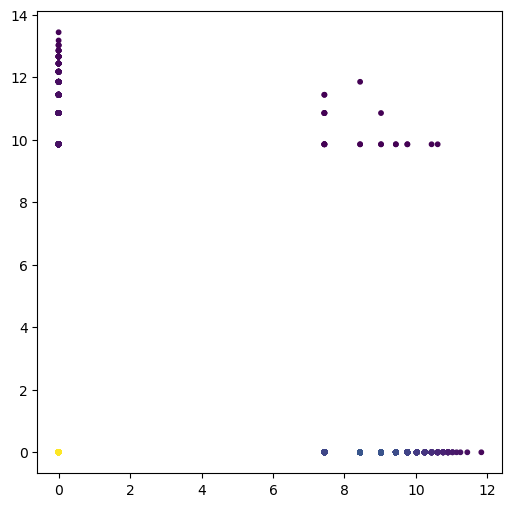

In [9]:
from scipy.stats import gaussian_kde

# Markers
x = cpm_norm["CD4"]
y = cpm_norm["CD8A"]

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(x, y, c=z, s=10)
plt.show()

In [10]:
# Gate cell population
gated = cpm_norm

# gated = cpm_norm[cpm_log2['CD4'] < 1]
# gated = gated[gated['CD8A'] > 1]

# Gate sample
# gated = gated[gated['Sample 1'] > 0.0]

gated

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZBED9-AS1,ZFAT-AS1,ZNF474,ZNF479,ZNF625-ZNF20,ZNF727,ZNRF3-AS1,ZNRF3-IT1,Sample_1,Sample_2
Cell_Index,,,,,,,,,,,,,,,,,,,,,
3921,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4283,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6221,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6620,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7685,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037153,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14039845,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14040219,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Sort Clonotypes

In [11]:
# Pick GEX-gated cell indices
gated_labels = gated.reset_index()
gated_labels = gated_labels[["Cell_Index"]]
# Process AIRR matrix
TCR = AIRR[AIRR["locus"].str.contains("IGH") == False]
TCR = TCR[TCR["locus"].str.contains("IGK") == False]
TCR = TCR[TCR["locus"].str.contains("IGL") == False]
productive= TCR.loc[TCR['productive']==True]
# Reconstruct Constant Fragments
# TRAC
productive['sequence_aa'] = productive['sequence_aa'].str.replace('IQNPDPAVYQLRDSKSSDKSVCLFTDFD','IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS')
# TRBC1
productive['sequence_aa'] = productive['sequence_aa'].str.replace('PEVAVFEPSEA','PEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF')
productive['sequence_aa'] = productive['sequence_aa'].str.replace('ATILYEILLGKATLYAVLVSALVLMAMVKRKDFEI','ATILYEILLGKATLYAVLVSALVLMAMVKRKDF')
productive.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
# Subset Columns
sort = productive[["cell_id", 'locus', 'sequence_aa','cdr3_aa']]
sort = sort.rename(columns={'cell_id': 'Cell_Index'})
sort.sort_values(by = 'Cell_Index', axis=0, ascending=True, inplace=True)
sort['sequence_aa'] = sort['sequence_aa'].apply(lambda x: x.rsplit('*', maxsplit=1)[-1])
sort['sequence_aa'] = sort['sequence_aa'].str.replace('^.*?[M]','M', regex=True)
# Pick individual TCR chains
sort_A = sort[sort["locus"].str.contains("TRA") == True]
sort_A['locus_sequence_aa'] = sort_A[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_B = sort[sort["locus"].str.contains("TRB") == True]
sort_B['locus_sequence_aa'] = sort_B[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_G = sort[sort["locus"].str.contains("TRG") == True]
sort_G['locus_sequence_aa'] = sort_G[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_D = sort[sort["locus"].str.contains("TRD") == True]
sort_D['locus_sequence_aa'] = sort_D[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
# Alpha-Beta TCR clonotyping
AB = pd.concat([sort_A, sort_B])
AB.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
AB = AB[["Cell_Index", 'locus_sequence_aa']]
AB = AB.groupby("Cell_Index")['locus_sequence_aa'].apply(lambda x: '___'.join(x.astype(str))).reset_index()
AB = AB[AB["locus_sequence_aa"].str.contains("TRA_") == True]
AB = AB[AB["locus_sequence_aa"].str.contains("TRB_") == True]
clonosort_AB = pd.merge(gated_labels, AB)
clonosort_AB.set_index(['Cell_Index'], inplace=True)
AB_counts = clonosort_AB.groupby(clonosort_AB["locus_sequence_aa"].tolist(),as_index=False).size()
AB_counts.sort_values(by = 'size', axis=0, ascending=False, inplace=True)
AB_counts = AB_counts.rename(columns={'index': 'AB TCR', 'size' : 'Number of Cells'})
# Gamma-Delta TCR clonotyping
GD = pd.concat([sort_G, sort_D])
GD.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
GD = GD[["Cell_Index","locus_sequence_aa"]]
GD = GD.groupby("Cell_Index")['locus_sequence_aa'].apply(lambda x: '___'.join(x.astype(str))).reset_index()
GD = GD[GD["locus_sequence_aa"].str.contains("TRG_") == True]
GD = GD[GD["locus_sequence_aa"].str.contains("TRD_") == True]
clonosort_GD = pd.merge(gated_labels, GD)
clonosort_GD.set_index(['Cell_Index'], inplace=True)
GD_counts = clonosort_GD.groupby(clonosort_GD["locus_sequence_aa"].tolist(),as_index=False).size()
GD_counts.sort_values(by = 'size', axis=0, ascending=False, inplace=True)
GD_counts = GD_counts.rename(columns={'index': 'GD TCR', 'size' : 'Number of Cells'})

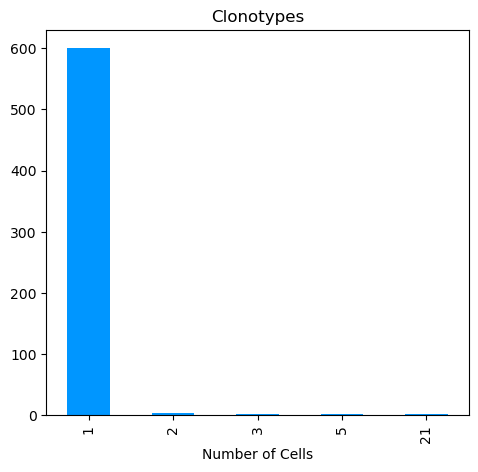

In [12]:
category_counts = AB_counts['Number of Cells'].value_counts()
sorted_category_counts = category_counts.sort_index()
sorted_category_counts.plot.bar(title='Clonotypes',color='#0096FF',figsize=(5.45,5))
plt.savefig('Clonotype Count.png', dpi=600, bbox_inches='tight')
plt.show()

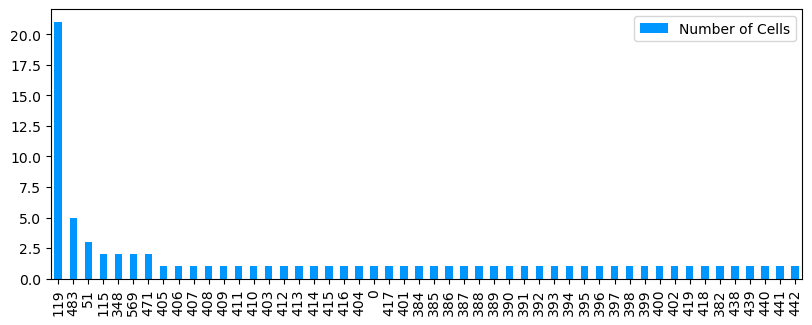

In [13]:
# Visualize and save Top 50 AB-Clonotypes
AB_vis = AB_counts.iloc[:50,:]
AB_vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,3.5))
plt.savefig('Clonosort AB.png', dpi=600, bbox_inches='tight')
# AB_counts.to_excel('AB_counts.xlsx')
AB_counts.to_csv('AB_counts.csv')
plt.show()

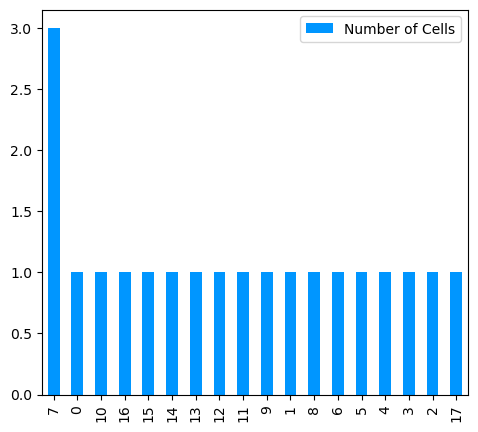

In [14]:
# Visualize and save Top 25 GD-Clonotypes
GD_vis = GD_counts.iloc[:25,:]
GD_vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(5.5,5))
plt.savefig('Clonosort GD.png', bbox_inches='tight')
# GD_counts.to_excel('GD_counts.xlsx')
GD_counts.to_csv('GD_counts.csv')
plt.show()

### Sort CDR3-types

In [27]:
# Pick GEX-gated cell indices
gated_labels = gated.reset_index()
gated_labels = gated_labels[["Cell_Index"]]
# Process AIRR matrix
TCR = AIRR[AIRR["locus"].str.contains("IGH") == False]
TCR = TCR[TCR["locus"].str.contains("IGK") == False]
TCR = TCR[TCR["locus"].str.contains("IGL") == False]
productive= TCR.loc[TCR['productive']==True]
# Sort by locus
productive.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
# Subset Columns
sort = productive[["cell_id", 'locus', 'cdr3_aa']]
sort = sort.rename(columns={'cell_id': 'Cell_Index'})
sort.sort_values(by = 'Cell_Index', axis=0, ascending=True, inplace=True)
# Build pre-pie chart data
CDR3 = pd.merge(gated_labels, sort)
# Pick individual TCR chains
sort_A = sort[sort["locus"].str.contains("TRA") == True]
sort_A['locus_cdr3_aa'] = sort_A[["locus", "cdr3_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_B = sort[sort["locus"].str.contains("TRB") == True]
sort_B['locus_cdr3_aa'] = sort_B[["locus", "cdr3_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_G = sort[sort["locus"].str.contains("TRG") == True]
sort_G['locus_cdr3_aa'] = sort_G[["locus", "cdr3_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_D = sort[sort["locus"].str.contains("TRD") == True]
sort_D['locus_cdr3_aa'] = sort_D[["locus", "cdr3_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
# Alpha-Beta TCR CDR3-typing
AB = pd.concat([sort_A, sort_B])
AB.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
AB = AB[["Cell_Index", 'locus_cdr3_aa']]
AB = AB.groupby("Cell_Index")['locus_cdr3_aa'].apply(lambda x: '___'.join(x.astype(str))).reset_index()
AB
AB = AB[AB["locus_cdr3_aa"].str.contains("TRA_") == True]
AB = AB[AB["locus_cdr3_aa"].str.contains("TRB_") == True]
CDR3sort_AB = pd.merge(gated_labels, AB)
CDR3sort_AB.set_index(['Cell_Index'], inplace=True)
AB_cdr3_counts = CDR3sort_AB.groupby(CDR3sort_AB["locus_cdr3_aa"].tolist(),as_index=False).size()
AB_cdr3_counts.sort_values(by = 'size', axis=0, ascending=False, inplace=True)
AB_cdr3_counts = AB_cdr3_counts.rename(columns={'index': 'AB CDR3', 'size' : 'Number of Cells'})
# Gamma-Delta TCR CDR3-typing
GD = pd.concat([sort_G, sort_D])
GD.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
GD = GD[["Cell_Index","locus_cdr3_aa"]]
GD = GD.groupby("Cell_Index")['locus_cdr3_aa'].apply(lambda x: '___'.join(x.astype(str))).reset_index()
GD = GD[GD["locus_cdr3_aa"].str.contains("TRG_") == True]
GD = GD[GD["locus_cdr3_aa"].str.contains("TRD_") == True]
CDR3sort_GD = pd.merge(gated_labels, GD)
CDR3sort_GD.set_index(['Cell_Index'], inplace=True)
GD_cdr3_counts = CDR3sort_GD.groupby(CDR3sort_GD["locus_cdr3_aa"].tolist(),as_index=False).size()
GD_cdr3_counts.sort_values(by = 'size', axis=0, ascending=False, inplace=True)
GD_cdr3_counts = GD_cdr3_counts.rename(columns={'index': 'GD CDR3', 'size' : 'Number of Cells'})

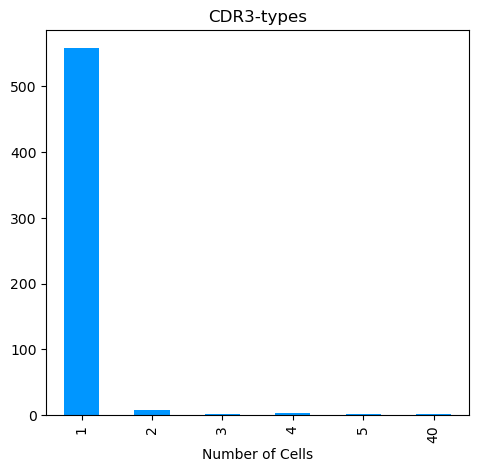

In [16]:
category_counts = AB_cdr3_counts['Number of Cells'].value_counts()
sorted_category_counts = category_counts.sort_index()
sorted_category_counts.plot.bar(title='CDR3-types',color='#0096FF',figsize=(5.45,5))
plt.savefig('CDR3-type Count.png', dpi=600, bbox_inches='tight')
plt.show()

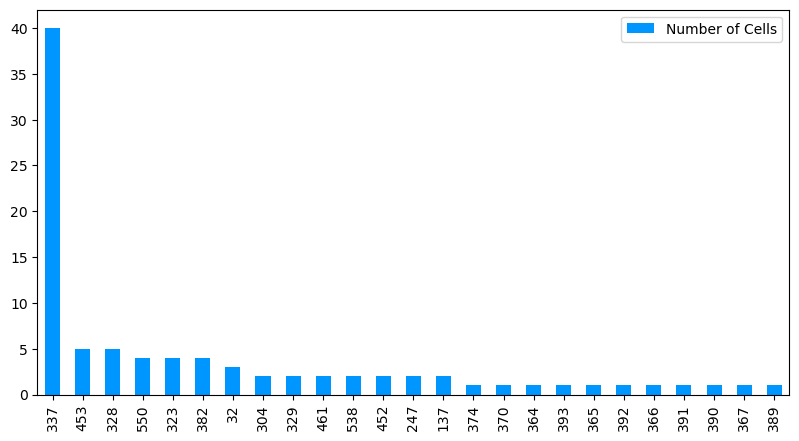

In [17]:
# Visualize and save Top 50 AB-CDR3-types
AB_cdr3_vis = AB_cdr3_counts.iloc[:25,:]
AB_cdr3_vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(9.7,5))
plt.savefig('Clonosort CDR3 AB.png', dpi=600, bbox_inches='tight')
# AB_cdr3_counts.to_excel('AB_cdr3_counts.xlsx')
AB_cdr3_counts.to_csv('AB_cdr3_counts.csv')
plt.show()

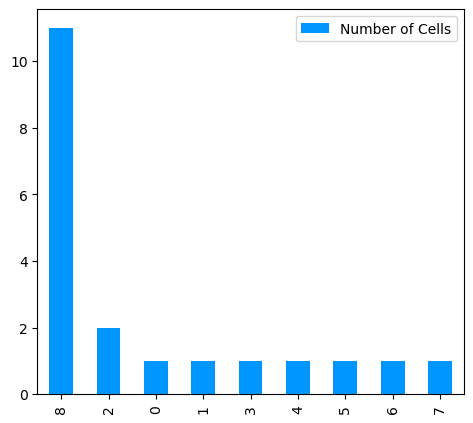

In [18]:
# Visualize and save Top 25 GD-CDR3-types
GD_cdr3_vis = GD_cdr3_counts.iloc[:25,:]
GD_cdr3_vis.plot(kind='bar',y='Number of Cells',color='#0096FF',figsize=(5.5,5))
plt.savefig('Clonosort CDR3 GD.png', bbox_inches='tight')
# GD_cdr3_counts.to_excel('GD_cdr3_counts.xlsx')
GD_cdr3_counts.to_csv('GD_cdr3_counts.csv')
plt.show()

## CDR3-pie chart

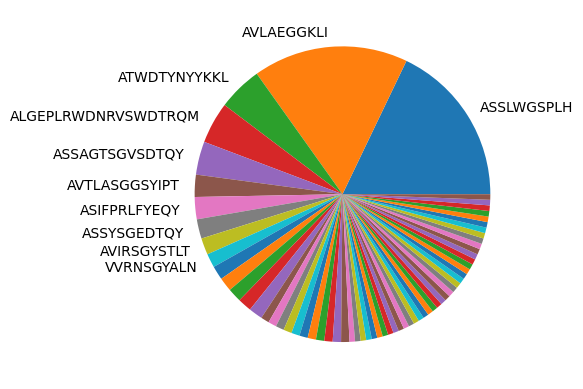

,CDR3,Percentage of Cells
0,ASSLWGSPLH,17.878788
1,AVLAEGGKLI,16.969697
2,ATWDTYNYYKKL,4.848485
3,ALGEPLRWDNRVSWDTRQM,4.545455
4,ASSAGTSGVSDTQY,3.636364
5,AVTLASGGSYIPT,2.424242
6,ASIFPRLFYEQY,2.424242
7,ASSYSGEDTQY,2.121212
8,AVIRSGYSTLT,1.818182
9,VVRNSGYALN,1.515152


In [42]:
# CDR3 filter - minimum number of cells with the same CDR3 
min_CDR3 = 2

# Optional - Remove non top-X CDR3s
CDR3_top = 10

# Count pie chart data
CDR3_pie = CDR3.groupby(CDR3["cdr3_aa"].tolist(),as_index=False).size()
CDR3_pie.sort_values(by = 'size', axis=0, ascending=False, inplace=True)
CDR3_pie = CDR3_pie.rename(columns={'index': 'CDR3', 'size' : 'Percentage of Cells'})
CDR3_pie = CDR3_pie[CDR3_pie['Percentage of Cells'] >= min_CDR3]
CDR3_pie[['Percentage of Cells']] = CDR3_pie[['Percentage of Cells']].apply(lambda x: x/CDR3_pie[['Percentage of Cells']].sum()*100, axis=1)
CDR3_pie.reset_index(drop=True, inplace=True)
CDR3_pie.loc[CDR3_top:,'CDR3'] = ''

plt.pie(CDR3_pie['Percentage of Cells'], labels = CDR3_pie['CDR3'])
plt.savefig('CDR3-pie chart.png', bbox_inches='tight', dpi= 600)
plt.show() 

CDR3_pie.head(CDR3_top)

# Clustering approach

In [86]:
# Minimum clonotypes
min_clones = 2

# Featurs to use for clustering
features_to_cluster = ['CD4', 'CD8A', 'NKG7', # T-cell type
                       'FOXP3', # Treg
                       # 'SELL','SELL','IL7R','CCR7', 'IL2RA', # T-cell type markers
                       # 'Dextramer_' # Peptide specificity
                       'Sample'
                      ]

In [87]:
TCRscape = cpm_log2[features_to_cluster]
TCRscape = pd.get_dummies(TCRscape, columns=['Sample'])
TCRscape = TCRscape.astype(float)
TCRscape.reset_index(drop=False, inplace=True)
# Pick GEX-gated cell indices
gated_labels = TCRscape.reset_index()
gated_labels = gated_labels[["Cell_Index"]]
# Process AIRR matrix
TCR = AIRR[AIRR["locus"].str.contains("IGH") == False]
TCR = TCR[TCR["locus"].str.contains("IGK") == False]
TCR = TCR[TCR["locus"].str.contains("IGL") == False]
productive= TCR.loc[TCR['productive']==True]
# Reconstruct Constant Fragments
productive['sequence_aa'] = productive.loc[:, 'sequence_aa']
# TRAC
productive['sequence_aa'] = productive['sequence_aa'].str.replace('IQNPDPAVYQLRDSKSSDKSVCLFTDFD','IQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS')
# TRBC1
productive['sequence_aa'] = productive['sequence_aa'].str.replace('PEVAVFEPSEA','PEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF')
productive['sequence_aa'] = productive['sequence_aa'].str.replace('ATILYEILLGKATLYAVLVSALVLMAMVKRKDFEI','ATILYEILLGKATLYAVLVSALVLMAMVKRKDF')
# Sort by locus
productive.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
# Subset Columns
sort = productive[["cell_id", 'locus', 'sequence_aa','cdr3_aa']]
sort = sort.rename(columns={'cell_id': 'Cell_Index'})
sort.sort_values(by = 'Cell_Index', axis=0, ascending=True, inplace=True)
sort['sequence_aa'] = sort['sequence_aa'].apply(lambda x: x.rsplit('*', maxsplit=1)[-1])
sort['sequence_aa'] = sort['sequence_aa'].str.replace('^.*?[M]','M', regex=True)
# Pick individual TCR chains
sort_A = sort[sort["locus"].str.contains("TRA") == True]
sort_A['locus_sequence_aa'] = sort_A[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_B = sort[sort["locus"].str.contains("TRB") == True]
sort_B['locus_sequence_aa'] = sort_B[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_G = sort[sort["locus"].str.contains("TRG") == True]
sort_G['locus_sequence_aa'] = sort_G[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
sort_D = sort[sort["locus"].str.contains("TRD") == True]
sort_D['locus_sequence_aa'] = sort_D[["locus", "sequence_aa"]].apply(
    lambda row: '_'.join(row.values.astype(str)),
    axis=1)
# Alpha-Beta TCR clonotyping
AB = pd.concat([sort_A, sort_B])
AB.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
AB = AB[["Cell_Index", 'locus_sequence_aa']]
AB = AB.groupby("Cell_Index")['locus_sequence_aa'].apply(lambda x: '___'.join(x.astype(str))).reset_index()
AB = AB[AB["locus_sequence_aa"].str.contains("TRA_") == True]
AB = AB[AB["locus_sequence_aa"].str.contains("TRB_") == True]
clonosort_AB = pd.merge(gated_labels, AB)
clonosort_AB.set_index(['Cell_Index'], inplace=True)
AB_counts = clonosort_AB.groupby(clonosort_AB["locus_sequence_aa"].tolist(),as_index=False).size()
AB_counts.sort_values(by = 'size', axis=0, ascending=False, inplace=True)
AB_counts = AB_counts.rename(columns={'index': 'AB TCR', 'size' : 'Number of Cells'})
# Gamma-Delta TCR clonotyping
GD = pd.concat([sort_G, sort_D])
GD.sort_values(by = 'locus', axis=0, ascending=True, inplace=True)
GD = GD[["Cell_Index","locus_sequence_aa"]]
GD = GD.groupby("Cell_Index")['locus_sequence_aa'].apply(lambda x: '___'.join(x.astype(str))).reset_index()
GD = GD[GD["locus_sequence_aa"].str.contains("TRG_") == True]
GD = GD[GD["locus_sequence_aa"].str.contains("TRD_") == True]
clonosort_GD = pd.merge(gated_labels, GD)
clonosort_GD.set_index(['Cell_Index'], inplace=True)
GD_counts = clonosort_GD.groupby(clonosort_GD["locus_sequence_aa"].tolist(),as_index=False).size()
GD_counts.sort_values(by = 'size', axis=0, ascending=False, inplace=True)
GD_counts = GD_counts.rename(columns={'index': 'GD TCR', 'size' : 'Number of Cells'})
AB_counts = AB_counts.rename(columns={'AB TCR': 'locus_sequence_aa'})
GD_counts = GD_counts.rename(columns={'GD TCR': 'locus_sequence_aa'})
# Merge clonotype counts
counts = pd.concat([AB_counts, GD_counts])
counts = counts.reset_index()
counts.drop('index', axis=1, inplace=True)
counts.set_index(['locus_sequence_aa'], inplace=True)
ab_index = AB.reset_index()
gd_index = GD.reset_index()
index = pd.concat([ab_index, gd_index])
index.drop('index', axis=1, inplace=True)
index.set_index(['locus_sequence_aa'], inplace=True)
clonosort = pd.merge(index, counts, left_index=True, right_index=True)
clonosort = clonosort.reset_index()
clonosort = clonosort[clonosort['Number of Cells'] >= min_clones]
TCRscape = pd.merge(TCRscape, clonosort)
TCRscape = TCRscape.rename(columns={'locus_sequence_aa': 'Clonotype'})
TCRscape['TCR_Type'] = TCRscape['Clonotype'].str.replace('TRA.*','1', regex=True)
TCRscape['TCR_Type'] = TCRscape['TCR_Type'].str.replace('TRD.*','0', regex=True)
TCRscape["TCR_Type"] = TCRscape["TCR_Type"].astype(int)
TCRscape = pd.get_dummies(TCRscape, columns=['Clonotype'], dtype=int)
TCRscape.set_index(['Cell_Index'], inplace=True)
TCRscape.head()

,CD4,CD8A,NKG7,FOXP3,Sample_1,Sample_2,Number of Cells,TCR_Type,Clonotype_TRA_MAMLLGASVLILWLQPDWVNSQQKNDDQQVKQNSPSLSVQEGRISILNCDYTNSMFDYFLWYKKYPAEGPTFLISISSIKDKNEDGRFTVFLNKSAKHLSLHIVPSQPGDSAVYFCAASANNQFYFGTGTSLTVIPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPGLLCWVLLCLLGAGSVETGVTQSPTHLIKTRGQQVTLRCSSQSGHNTVSWYQQALGQGPQFIFQYYREEENGRGNFPPRFSGLQFPNYSSELNVNALELDDSALYLCASSLDGYTGELFFGEGSRLTVLEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MEKMLECAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLRGLFWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTKKESFLHITAPKPEDSATYLCAVLAEGGKLIFGQGTELSVKPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MAMVKRKDF,Clonotype_TRA_MEKMLECAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLRGLFWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTKKESFLHITAPKPEDSATYLCAVLAEGGKLIFGQGTELSVKPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPQLLGYVVLCLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQDPGLGLRQIYYSMNVEVTDKGDVPEGYKVSRKEKRNFPLILESPSPNQTSLYFCASSLWGSPLHFGNGTRLTVTEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MMISLRVLLVILWLQLSWVWSQRKEVEQDPGPFNVPEGATVAFNCTYSNSASQSFFWYRQDCRKEPKLLMSVYSSGNEDGRFTAQLNRASQYISLLIRDSKLSDSATYLCVVRNSGYALNFGKGTSLLVTPHIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MSQNDFLESPAPLSSMHRYRRPLRHAASAMSIGLLCCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMSWYRQDPGMGLRLIHYSVGAGITDQGEVPNGYNVSRSTTEDFPLRLLSAAPSQTSVYFCASSYSGEDTQYFGPGTRLTVLEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MAMVKRKDF,Clonotype_TRA_MRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPQLLGYVVLCLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQDPGLGLRQIYYSMNVEVTDKGDVPEGYKVSRKEKRNFPLILESPSPNQTSLYFCASSLWGSPLHFGNGTRLTVTEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MVKIRQFLLAILWLQLSCVSAAKNEVEQSPQNLTAQEGEFITINCSYSVGISALHWLQQHPGGGIVSLFMLSSGKKKHGRLIATINIQEKHSSLHITASHPRDSAVYICAVWEYGNKLVFGAGTILRVKSYIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPGLLHWMALCLLGTGHGDAMVIQNPRYQVTQFGKPVTLSCSQTLNHNVMYWYQQKSSQAPKLLFHYYDKDFNNEADTPDNFQSRRPNTSFCFLDIRSPGLGDAAMYLCATSRDLYYGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRD_MLFSSLLCVFVAFSYSGSSVAQKVTQAQSSVSMPVRKAVTLNCLYETSWWSYYIFWYKQLPSKEMIFLIRQGSDEQNAKSGRYSVNFKKAAKSVALTISALQLEDSAKYFCALGEPLRWDNRVSWDTRQMFFGTGIKLFVEPRSQPHTKPSVFVMKNGTNVACLVKEFYPKD___TRG_MRWALAVLLAFLSPASQKSSNLEGRTKSVTRQTGSSAEITCDLTVTNTFYIHWYLHQEGKAPQRLLYYDVSTARDVLESGLSPGKYYTHTPRRWSWILRLQNLIENDSGVYYCATWDTYNYYKKLFGSGTTLVVTDKQLDADVS
Cell_Index,,,,,,,,,,,,,,,,
148612,0.0,12.179355,10.482715,0.0,1.0,0.0,21,1,0,0,1,0,0,0,0,0
907039,0.0,11.442390,10.260322,0.0,1.0,0.0,21,1,0,0,1,0,0,0,0,0
1779851,0.0,12.179355,10.675360,0.0,1.0,0.0,21,1,0,0,1,0,0,0,0,0
2073294,0.0,12.664782,9.260322,0.0,1.0,0.0,21,1,0,0,1,0,0,0,0,0
2387392,0.0,11.857427,7.675360,0

In [88]:
# Optional - use predicted binding information
# Add ERGO-II / ESM-TCR  / any other binding prediction info to the TCRscape
binding = pd.read_csv("binding.csv",low_memory=False)
binding.drop(['TRA','TRAV','TRAJ',
              'TRB','TRBV','TRBJ'], axis=1, inplace=True)
binding = pd.get_dummies(binding, columns=['MHC'], dtype=int)
# binding = pd.get_dummies(binding, columns=['Peptide'], dtype=int)
binding.set_index(['Cell_Index'], inplace=True)
# binding = binding.astype(float)
binding.head()

,Score,MHC_HLA-A*02
Cell_Index,,
1044547,0,1
18110,0,1
2668485,0,1
1509895,0,1
615602,0,1


In [89]:
TCRscape_binding = pd.merge(TCRscape,binding,how='left',left_index=True, right_index=True)
TCRscape_binding = TCRscape_binding.fillna(0)
TCRscape = TCRscape_binding

# Optional - Gate sample
# X = TCRscape
# X = X[X['Sample_1'] > 0.0]
# TCRscape = X

In [90]:
X = TCRscape

# Plot background color
plt.rcParams['axes.facecolor'] = 'white'
# plt.rcParams['axes.facecolor'] = 'black'

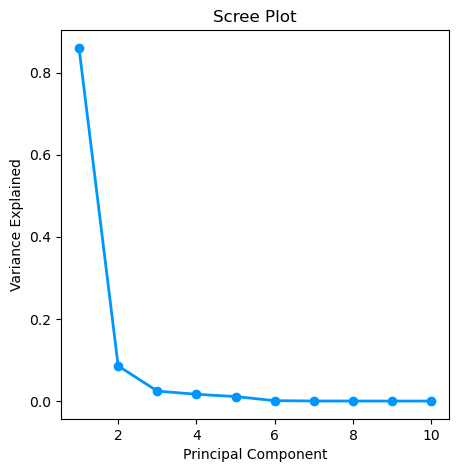

In [91]:
# PCA
pca = PCA(n_components=10)
pca_fit = pca.fit(X.T)
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(5,5.045))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='#0096FF')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.savefig('Scree Plot.png', dpi=600, bbox_inches='tight')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/lk/54m90rgj1fqg895lxsgx1l180000gn/T/ipykernel_12718/3384980135.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],


Text(0, 0.5, 'UMAP 2')

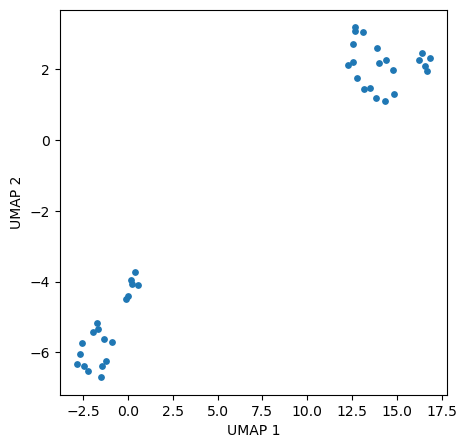

In [92]:
n_components = 2 # From the Scree Plot

# UMAP
clusterable_embedding = umap.UMAP(
                                  n_neighbors=5,
                                  min_dist=0.1,
                                  n_components=n_components,
                                  random_state=14,
                                 ).fit_transform(X)
plt.figure(figsize=(5,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
             s=15, cmap='Spectral')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

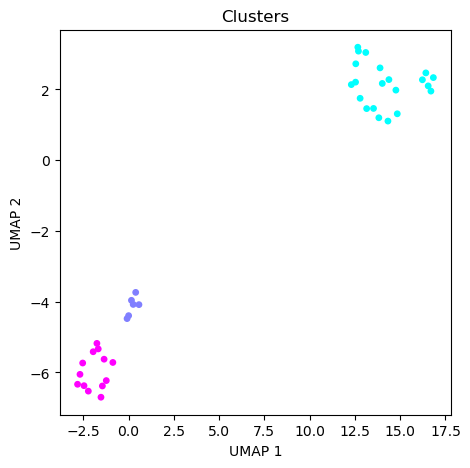

In [106]:
#HDBScan clustering
hdbscan_labels = hdbscan.HDBSCAN(min_samples=4,
                                 min_cluster_size=3).fit_predict(clusterable_embedding)

c = pd.Series(hdbscan_labels)
TCRscape = TCRscape.reset_index()
TCRscape['Cluster'] = c
TCRscape.set_index("Cell_Index", inplace=True)

#HDBScan UMAP Plot
clustered = (hdbscan_labels >= -1)
plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=hdbscan_labels[clustered],
            s=15,
            cmap='cool');

plt.title("Clusters")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Clusters.png', dpi=600, bbox_inches='tight')

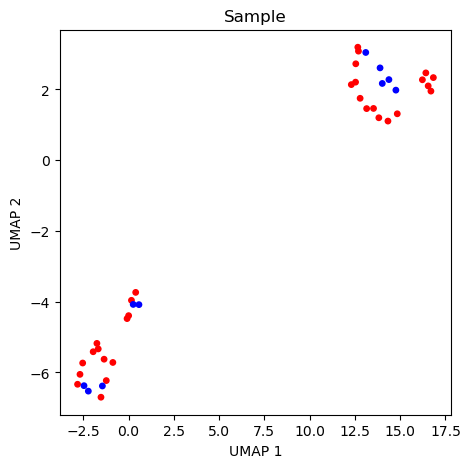

In [107]:
#UMAP Feature plot

feature = TCRscape["Sample_1"]

plt.figure(figsize=(5.05,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Sample")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.savefig('TCRscape Samples.png', dpi=600, bbox_inches='tight')

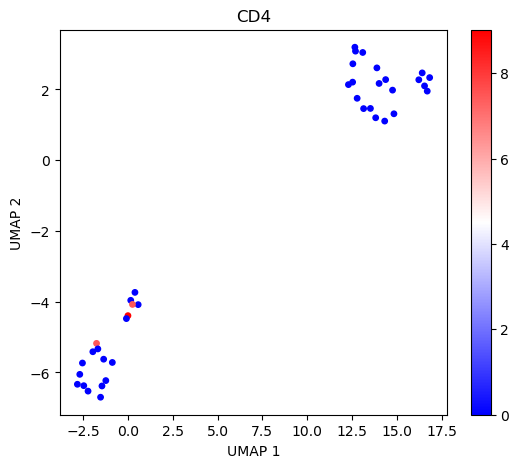

In [108]:
#UMAP Feature plot

feature = TCRscape["CD4"]

plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("CD4")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape CD4.png', dpi=600, bbox_inches='tight')

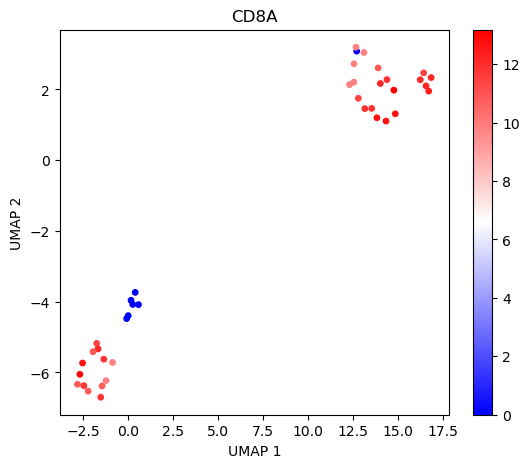

In [109]:
#UMAP Feature plot

feature = TCRscape["CD8A"]

plt.figure(figsize=(6.275,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("CD8A")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape CD8A.png', dpi=600, bbox_inches='tight')

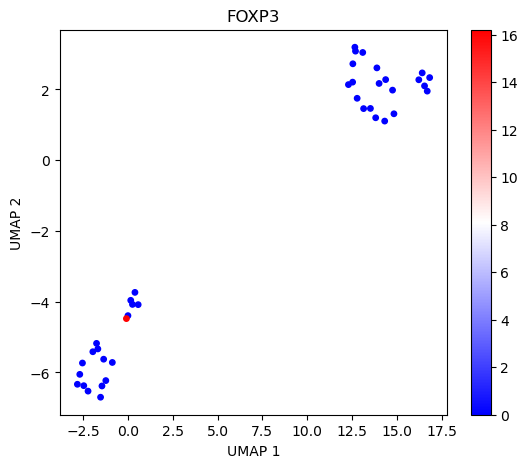

In [110]:
#UMAP Feature plot

feature = TCRscape["FOXP3"]

plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("FOXP3")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape FOXP3.png', dpi=600, bbox_inches='tight')

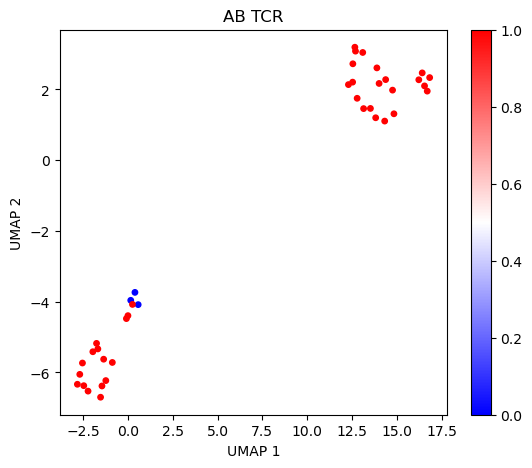

In [111]:
#UMAP Feature plot

feature = TCRscape["TCR_Type"]


plt.figure(figsize=(6.25,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("AB TCR")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape TCR Type.png', dpi=600, bbox_inches='tight')

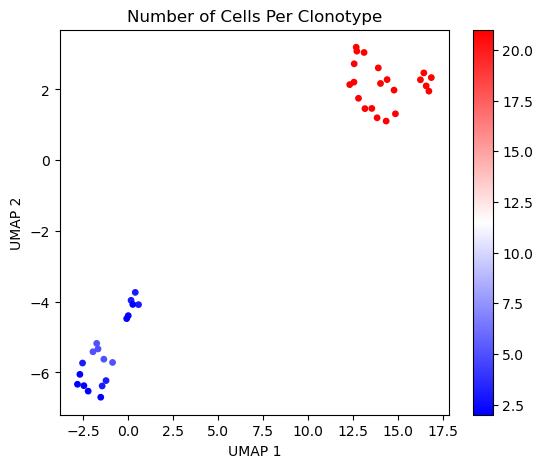

In [112]:
#UMAP Feature plot

feature = TCRscape["Number of Cells"]

plt.figure(figsize=(6.278,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Number of Cells Per Clonotype")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Number of Cells Per Clonotype.png', dpi=600, bbox_inches='tight')

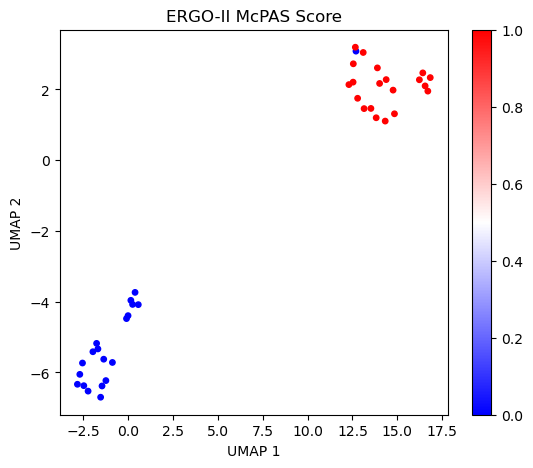

In [113]:
#UMAP Feature plot

feature = TCRscape["Score"]

plt.figure(figsize=(6.26,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("ERGO-II McPAS Score")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape ERGO-II McPAS Score.png', dpi=600, bbox_inches='tight')

In [84]:
# Export clusters
# TCRscape.to_excel('TCRscape.xlsx')
TCRscape.to_csv('TCRscape.csv')

In [114]:
# Rename the clonotype of choice
TCRscape = TCRscape.rename(columns={'Clonotype_TRA_MEKMLECAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLRGLFWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTKKESFLHITAPKPEDSATYLCAVLAEGGKLIFGQGTELSVKPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPQLLGYVVLCLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQDPGLGLRQIYYSMNVEVTDKGDVPEGYKVSRKEKRNFPLILESPSPNQTSLYFCASSLWGSPLHFGNGTRLTVTEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF': 'Dominant Clonotype'})

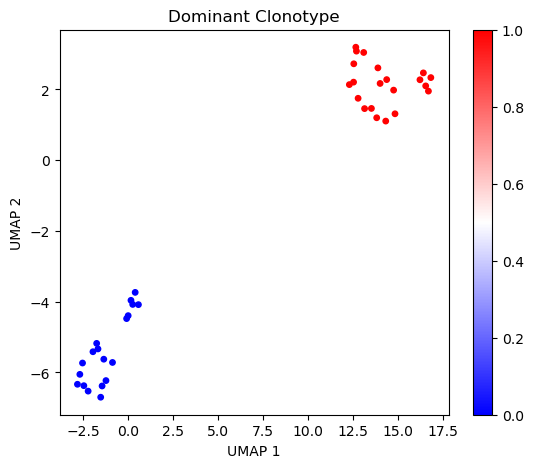

In [115]:
#UMAP Feature plot

feature = TCRscape["Dominant Clonotype"]

plt.figure(figsize=(6.27,5))
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],
            c = feature, cmap = "bwr", s = 15)

plt.title("Dominant Clonotype")
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.colorbar()

plt.savefig('TCRscape Dominant Clonotype.png', dpi=600, bbox_inches='tight')

# Export clonotype data per Sample to Seurat

In [154]:
# ST1
sample = ST_1

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,TCRscape,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype.to_csv('ST 5 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_1,Sample_2,Number of Cells,TCR_Type,Clonotype_TRA_MAMLLGASVLILWLQPDWVNSQQKNDDQQVKQNSPSLSVQEGRISILNCDYTNSMFDYFLWYKKYPAEGPTFLISISSIKDKNEDGRFTVFLNKSAKHLSLHIVPSQPGDSAVYFCAASANNQFYFGTGTSLTVIPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPGLLCWVLLCLLGAGSVETGVTQSPTHLIKTRGQQVTLRCSSQSGHNTVSWYQQALGQGPQFIFQYYREEENGRGNFPPRFSGLQFPNYSSELNVNALELDDSALYLCASSLDGYTGELFFGEGSRLTVLEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MEKMLECAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLRGLFWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTKKESFLHITAPKPEDSATYLCAVLAEGGKLIFGQGTELSVKPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MAMVKRKDF,Dominant Clonotype,Clonotype_TRA_MMISLRVLLVILWLQLSWVWSQRKEVEQDPGPFNVPEGATVAFNCTYSNSASQSFFWYRQDCRKEPKLLMSVYSSGNEDGRFTAQLNRASQYISLLIRDSKLSDSATYLCVVRNSGYALNFGKGTSLLVTPHIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MSQNDFLESPAPLSSMHRYRRPLRHAASAMSIGLLCCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMSWYRQDPGMGLRLIHYSVGAGITDQGEVPNGYNVSRSTTEDFPLRLLSAAPSQTSVYFCASSYSGEDTQYFGPGTRLTVLEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MAMVKRKDF,Clonotype_TRA_MRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPQLLGYVVLCLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQDPGLGLRQIYYSMNVEVTDKGDVPEGYKVSRKEKRNFPLILESPSPNQTSLYFCASSLWGSPLHFGNGTRLTVTEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MVKIRQFLLAILWLQLSCVSAAKNEVEQSPQNLTAQEGEFITINCSYSVGISALHWLQQHPGGGIVSLFMLSSGKKKHGRLIATINIQEKHSSLHITASHPRDSAVYICAVWEYGNKLVFGAGTILRVKSYIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPGLLHWMALCLLGTGHGDAMVIQNPRYQVTQFGKPVTLSCSQTLNHNVMYWYQQKSSQAPKLLFHYYDKDFNNEADTPDNFQSRRPNTSFCFLDIRSPGLGDAAMYLCATSRDLYYGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRD_MLFSSLLCVFVAFSYSGSSVAQKVTQAQSSVSMPVRKAVTLNCLYETSWWSYYIFWYKQLPSKEMIFLIRQGSDEQNAKSGRYSVNFKKAAKSVALTISALQLEDSAKYFCALGEPLRWDNRVSWDTRQMFFGTGIKLFVEPRSQPHTKPSVFVMKNGTNVACLVKEFYPKD___TRG_MRWALAVLLAFLSPASQKSSNLEGRTKSVTRQTGSSAEITCDLTVTNTFYIHWYLHQEGKAPQRLLYYDVSTARDVLESGLSPGKYYTHTPRRWSWILRLQNLIENDSGVYYCATWDTYNYYKKLFGSGTTLVVTDKQLDADVS,Score,MHC_HLA-A*02,Cluster
Cell_Index,,,,,,,,,,,,,,,,,,,
3921,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4283,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6221,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6620,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7685,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14032224,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14035652,0.0,9.857427,7.67536,0.0,1.0,0.0,21.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
14040973,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
# ST2
sample = ST_2

Cell_Index = sample.reset_index()
Cell_Index = Cell_Index[["Cell_Index"]]
Cell_Index.set_index(['Cell_Index'], inplace=True)

sample_clonotype = pd.merge(Cell_Index,TCRscape,how='left',left_index=True, right_index=True)
sample_clonotype = sample_clonotype.fillna(0)
sample_clonotype.to_csv('ST 6 Clonotypes.csv')
sample_clonotype

,CD4,CD8A,NKG7,FOXP3,Sample_1,Sample_2,Number of Cells,TCR_Type,Clonotype_TRA_MAMLLGASVLILWLQPDWVNSQQKNDDQQVKQNSPSLSVQEGRISILNCDYTNSMFDYFLWYKKYPAEGPTFLISISSIKDKNEDGRFTVFLNKSAKHLSLHIVPSQPGDSAVYFCAASANNQFYFGTGTSLTVIPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPGLLCWVLLCLLGAGSVETGVTQSPTHLIKTRGQQVTLRCSSQSGHNTVSWYQQALGQGPQFIFQYYREEENGRGNFPPRFSGLQFPNYSSELNVNALELDDSALYLCASSLDGYTGELFFGEGSRLTVLEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MEKMLECAFIVLWLQLGWLSGEDQVTQSPEALRLQEGESSSLNCSYTVSGLRGLFWYRQDPGKGPEFLFTLYSAGEEKEKERLKATLTKKESFLHITAPKPEDSATYLCAVLAEGGKLIFGQGTELSVKPNIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MAMVKRKDF,Dominant Clonotype,Clonotype_TRA_MMISLRVLLVILWLQLSWVWSQRKEVEQDPGPFNVPEGATVAFNCTYSNSASQSFFWYRQDCRKEPKLLMSVYSSGNEDGRFTAQLNRASQYISLLIRDSKLSDSATYLCVVRNSGYALNFGKGTSLLVTPHIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MSQNDFLESPAPLSSMHRYRRPLRHAASAMSIGLLCCAALSLLWAGPVNAGVTQTPKFQVLKTGQSMTLQCAQDMNHEYMSWYRQDPGMGLRLIHYSVGAGITDQGEVPNGYNVSRSTTEDFPLRLLSAAPSQTSVYFCASSYSGEDTQYFGPGTRLTVLEDLKNVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MAMVKRKDF,Clonotype_TRA_MRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPQLLGYVVLCLLGAGPLEAQVTQNPRYLITVTGKKLTVTCSQNMNHEYMSWYRQDPGLGLRQIYYSMNVEVTDKGDVPEGYKVSRKEKRNFPLILESPSPNQTSLYFCASSLWGSPLHFGNGTRLTVTEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRA_MVKIRQFLLAILWLQLSCVSAAKNEVEQSPQNLTAQEGEFITINCSYSVGISALHWLQQHPGGGIVSLFMLSSGKKKHGRLIATINIQEKHSSLHITASHPRDSAVYICAVWEYGNKLVFGAGTILRVKSYIQNPDPAVYQLRDSKSSDKSVCLFTDFDSQTNVSQSKDSDVYITDKTVLDMRSMDFKSNSAVAWSNKSDFACANAFNNSIIPEDTFFPSPESSCDVKLVEKSFETDTNLNFQNLSVIGFRILLLKVAGFNLLMTLRLWSS___TRB_MGPGLLHWMALCLLGTGHGDAMVIQNPRYQVTQFGKPVTLSCSQTLNHNVMYWYQQKSSQAPKLLFHYYDKDFNNEADTPDNFQSRRPNTSFCFLDIRSPGLGDAAMYLCATSRDLYYGYTFGSGTRLTVVEDLNKVFPPEVAVFEPSEAEISHTQKATLVCLATGFFPDHVELSWWVNGKEVHSGVSTDPQPLKEQPALNDSRYCLSSRLRVSATFWQNPRNHFRCQVQFYGLSENDEWTQDRAKPVTQIVSAEAWGRADCGFTSVSYQQGVLSATILYEILLGKATLYAVLVSALVLMAMVKRKDF,Clonotype_TRD_MLFSSLLCVFVAFSYSGSSVAQKVTQAQSSVSMPVRKAVTLNCLYETSWWSYYIFWYKQLPSKEMIFLIRQGSDEQNAKSGRYSVNFKKAAKSVALTISALQLEDSAKYFCALGEPLRWDNRVSWDTRQMFFGTGIKLFVEPRSQPHTKPSVFVMKNGTNVACLVKEFYPKD___TRG_MRWALAVLLAFLSPASQKSSNLEGRTKSVTRQTGSSAEITCDLTVTNTFYIHWYLHQEGKAPQRLLYYDVSTARDVLESGLSPGKYYTHTPRRWSWILRLQNLIENDSGVYYCATWDTYNYYKKLFGSGTTLVVTDKQLDADVS,Score,MHC_HLA-A*02,Cluster
Cell_Index,,,,,,,,,,,,,,,,,,,
3091,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3517,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14037153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14039845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14040219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
